# Overview 
 - Plotting: An axample.
 - Alternate Versions
 - Exercises
 - Solutions
 
 ## First plotting experiment: White noise
 
Below we will plot using matplotlib independant stand normal values to create a white noise line plot. 

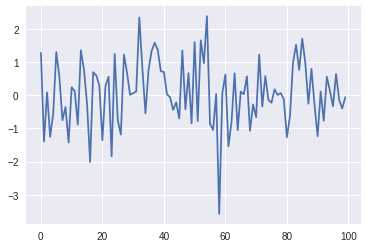

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.randn(100)
plt.plot(x)
plt.show()

### Breakdown 

Now let's look at each part of the code above to understand what it is doing. 

The first two lines we are importing functions in our python environment. Like we discussed in the previous notes, NumPy is useful for numerical manipulations and calculations, it is normally imported as "np". This is standard practice and is more convientent than writing out NumPy for each function call. However that is an option, see below. 

In [2]:
import numpy

numpy.sqrt(3)

1.7320508075688772

Packages like NumPy in Python extend it's usefulness. Python is a small core language that is easy to learn and maintain, and extra functionality is adding through these packages. These packages are actually directories containing the relavent code, with a \_\_init.py\_\_  file at the top level specifying what is imported when "import package" is called. These packages can also contain subpackages, see the previous code example. sqrt is a subpackage of numpy, and can be called explicitly.

In [3]:
from numpy import sqrt 

sqrt(3)

1.7320508075688772

### Alternative Versions

Instead of creating a list using directly from numpy, we can use a for loop to specify length in our object creation. 


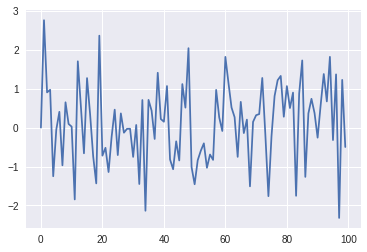

In [4]:
ts_length = 100  #Range of our model 
ϵ_values = []   # Empty list

for i in range(ts_length):  #for i in range of our predetermined length
    e = np.random.randn()   #e is a number from the standard normal distrubtion
    ϵ_values.append(e)      #e_values is the empy list we append each e to

plt.plot(ϵ_values)
plt.show()

This produced the same kind of plot as the first example, but highlights python lists and control using a 
for loop. The code is annoted to show what each component is doing. 

### Lists

Lists in python are a native data structure and are used to collect a group of object that do not need to be of the same type. Lists can have methods called on them like every other object, and can be modified. See below. 

In [5]:
x = [10, 'foo', False]  # x is a list containing heterogenous data. 
type(x)

list

In [7]:
x.append(2.5) # We can add to x using the very handy "append" method. 
x             # Methods are functions that are attached to objects and objects are instances of classes 

[10, 'foo', False, 2.5, 2.5]

Append() is one example of a list method. 
Objects all have methods of their own, arrarys have array methods, strings have string methods, etc. 
Another useful list method is pop()

In [8]:
x.pop()

2.5

In [9]:
x

[10, 'foo', False, 2.5]

As you can see this method is short hand for removing the last entry in a list. It is important to understand aswell that indexing in python is 0 based, so x[0] returns the first argument.

In [10]:
x[0]

10

And x[1] would return the second.

In [11]:
x[1]

'foo'

### Alternative 2

We have seen an example of a for loop, but the conditional "while" can also be used to control in python

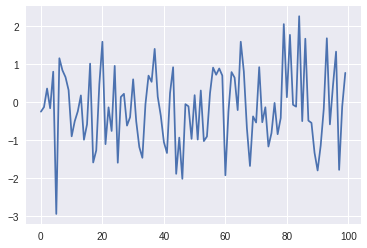

In [13]:
ts_length = 100 #This is the same length as in the for loop.
ϵ_values = []   #We are making the same empty list to place our values
i = 0           #Here we are setting our iterator to 0
while i < ts_length: #The control statement, while i < 100
    e = np.random.randn() #e is a random number from the distribution
    ϵ_values.append(e) #append each e to the list as before 
    i = i + 1 #now increment i to be equal to i + 1.
plt.plot(ϵ_values)
plt.show()

### Alternative 3

User defined functions can be created with explicit controls as arguments to the function. In this case, a value of "n" which denotes the number of samples requred for the plot is input as range of an internal loop.

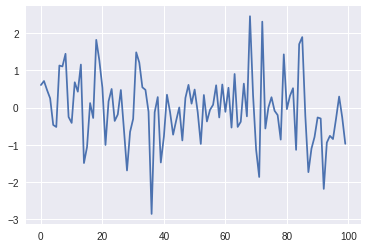

In [16]:
def generate_data(n):  #Here we define a function call "generate_data", it has one argument "n"
    ϵ_values = []      #we make an empty list as before.
    for i in range(n): # here n is input as the length of the range for the number of values
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100) #now we make an object "data" which is a list generated by the user defined function.
plt.plot(data)
plt.show()

This is an excerpt from Quantecon about defining functions.

"def is a Python **keyword** used to start function definitions.


- def generate_data(n): indicates that the function is called generate_data, and that it has a single argument n


- The indented code is a code block called the function body—in this case it creates an iid list of random draws using the same logic as before


- The return keyword indicates that ϵ_values is the object that should be returned to the calling code


- This whole function definition is read by the Python interpreter and stored in memory

- When the interpreter gets to the expression generate_data(100), it executes the function body with n set equal to 100

The net result is that the name data is bound to the list ϵ_values returned by the function"

### Alternative 4

Conditionals are statements in a function that control the output of a function, based on certain input. 

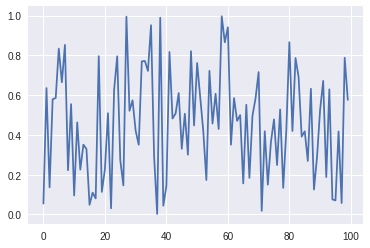

In [17]:
def generate_data(n, generator_type): #We now have two arguments
    ϵ_values = [] #create an empy list
    for i in range(n): #the range for the data to be produced.
        if generator_type == 'U': #the conditional which controls the output type
            e = np.random.uniform(0, 1) #if generator_type = U, then randon uniform distribution between 0,1
        else:
            e = np.random.randn() #if it is ANYTHING else, then randon normal distribution
        ϵ_values.append(e) #append each element of e, no matter the type to the empyt list 
    return ϵ_values #return the list. 

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

## List Comprehensions

List comprehensions are elegent ways of creating lists by operating on the contents of list, for example. 

In [19]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals]
plurals

['dogs', 'cats', 'birds']

Another example: 

In [22]:
doubles = [2 * x for x in range(8)]
doubles

[0, 2, 4, 6, 8, 10, 12, 14]

This creates a list each element of the list is 2 times the value of the output from range(8).

What this allow is for the simplification of list creation like what we used in the above scenarios. Instead of the for loop containing the list, the list can contain the logic of the for loop control. The below example can thus be abbreviated. 

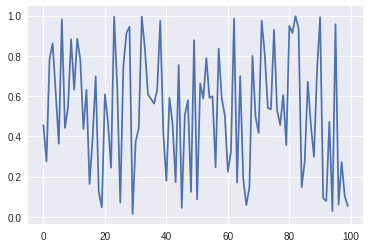

In [28]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

Is more easily written as: 

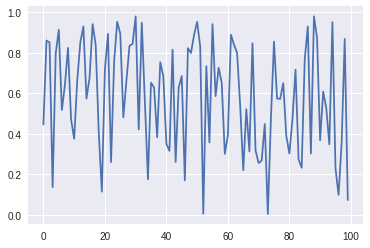

In [29]:
def generate_data(n, generator_type):
    ϵ_values = [generator_type() for i in range(n)]
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

## Exercise 1

Recall that n! is read as “n factorial” and defined as n!=n×(n−1)×⋯×2×1.

There are functions to compute this in various modules, but let’s write our own version as an exercise

In particular, write a function factorial such that factorial(n) returns n! for any positive integer n

In [56]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(9)

362880

There is an important lesson here: range(n) is exclusive of n, so range(8) is a list [0,1,2,3,4,5,6,7], thus set k = 1, then say that the value of k = k * (i +1),  this gets rid of 0, and brings 8 back to the list. 

## Exercise 2

The binomial random variable Y∼Bin(n,p) represents the number of successes in n binary trials, where each trial succeeds with probability p


Without any import besides from numpy.random import uniform, write a function binomial_rv such that binomial_rv(n, p) generates one draw of Y


Hint: If U is uniform on (0,1) and p∈(0,1), then the expression U < p evaluates to True with probability p

In [101]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

5

## Exervise 3

Compute an approximation to π using Monte Carlo. Use no imports besides import numpy as np:


Your hints are as follows:

- If U is a bivariate uniform random variable on the unit square (0,1)^2, then the probability that U lies in a subset B of (0,1)^2 is equal to the area of B

- If U1,…,Un are iid copies of U, then, as n gets large, the fraction that fall in B converges to the probability of landing in B 
- For a circle, area = pi * radius^2

In [1]:
import numpy as np 

def estimate_pi(n):
  count = 0
  for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1
        area_estimate = count / n
  print(area_estimate * 4)  # dividing by radius**2

estimate_pi(10000)

3.1196


I'll pick this one apart because it was difficult for me. 

I am making the function estimate_pi, with an arguement n, which is the number of attemtps to predict pi.

We know we have a circle circumscribed in a square with radius 1/2. We make two random uniform distributions between 0, 1 which are the x, y coordinates of each point. If the distance (pythagorean) from the center to the point is greater than 0.5 (the radius) it is outside the circle, if lesser, it is inside the circle. The ratio of points inside the circle to to the points outside the circle times four is approximately pi. I find a visual aid really helps here so I will plot it too.

3.14196


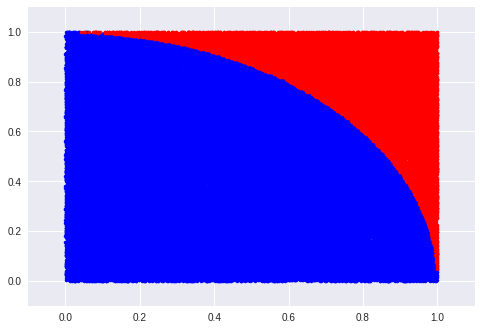

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

def estimate_pi(n):
  count = 0
  for i in range(n):
    u, v = np.random.uniform(), np.random.uniform()
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1
        area_estimate = count / n
  print(area_estimate * 4)  # dividing by radius**
  
  p = np.random.rand(n, 2)
  idx = np.sqrt(p[:,0]**2+p[:,1]**2) < 1
  plt.plot(p[idx,0],p[idx,1],'b.') # point inside
  plt.plot(p[idx==False,0],p[idx==False,1],'r.') # point outside
  plt.axis([-0.1,1.1,-0.1,1.1]) 
  plt.show()
  
estimate_pi(100000)



### Exercise 4 
Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar
- If not, pay nothing

Use no import besides from numpy.random import uniform

In [40]:
from numpy.random import uniform

payoff = 0
count = 0

for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0
    if count == 3:
        payoff = 1

print(payoff)

0


### Exercise 5

Your next task is to simulate and plot the correlated time series

- xt+1=αxt+εt+1wherex0=0andt=0,…,T
- The sequence of shocks {εt} is assumed to be iid and standard normal

In your solution, restrict your import statements to 
- import numpy as np
- import matplotlib.pyplot as plt

Set t = 200 and α = 0.9

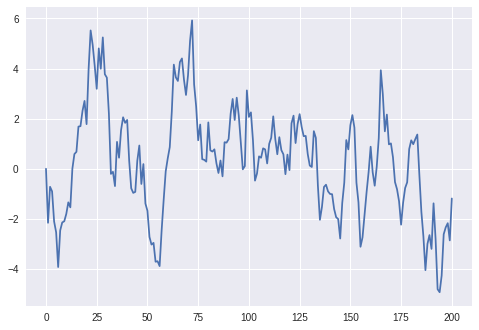

In [60]:
α = 0.9
ts_length = 200
current_x = 0

x_values = []
for i in range(ts_length + 1):
    x_values.append(current_x)
    current_x = α * current_x + np.random.randn()
plt.plot(x_values)
plt.show()

### Exercise 6

Now, starting with your solution to exercise 5, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98

*(The figure nicely illustrates how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities.)*

**Use a for loop to step through the α values**

Important hints:
- If you call the plot() function multiple times before calling show(), all of the lines you produce will end up on the same figure
  - And if you omit the argument 'b-' to the plot function, Matplotlib will automatically select different colors for each line
- The expression 'foo' + str(42) evaluates to 'foo42'

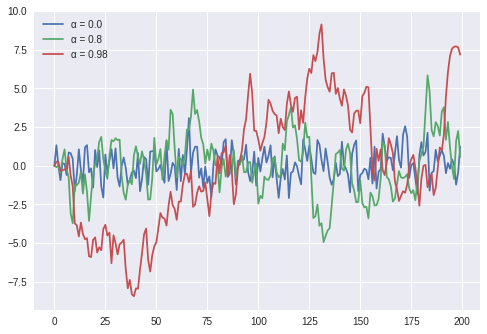

In [76]:
αs = [0.0, 0.8, 0.98]
ts_length = 200

for α in αs:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    plt.plot(x_values, label=f'α = {α}')
plt.legend()
plt.show()